# Dataset #2

Step #1 EDA
- Detect issues such as missing values, duplicates, or inconsistencies

In [60]:
import pandas as pd
import numpy as np

df = pd.read_csv("program2.csv")
print(df)

      year    state state_abbr          county  percent_depression  \
0     2021   Alaska         AK  Aleutians East                13.1   
1     2021   Alaska         AK  Aleutians East                13.0   
2     2021   Alaska         AK  Aleutians West                13.5   
3     2021   Alaska         AK  Aleutians West                13.4   
4     2021   Alaska         AK       Anchorage                19.5   
...    ...      ...        ...             ...                 ...   
6147  2021  Wyoming         WY           Uinta                20.1   
6148  2021  Wyoming         WY        Washakie                19.5   
6149  2021  Wyoming         WY        Washakie                18.1   
6150  2021  Wyoming         WY          Weston                20.7   
6151  2021  Wyoming         WY          Weston                19.4   

      total_population  
0                 3398  
1                 3398  
2                 5059  
3                 5059  
4               288121  
...      

In [61]:
df.shape

(6152, 6)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6152 entries, 0 to 6151
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                6152 non-null   int64  
 1   state               6152 non-null   object 
 2   state_abbr          6152 non-null   object 
 3   county              6152 non-null   object 
 4   percent_depression  6152 non-null   float64
 5   total_population    6152 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 288.5+ KB


In [63]:
print(f"The number of rows= {df.shape[0]}")
print(f"The number of columns= {df.shape[1]}")

The number of rows= 6152
The number of columns= 6


In [64]:
df.columns

Index(['year', 'state', 'state_abbr', 'county', 'percent_depression',
       'total_population'],
      dtype='object')

In [65]:
#display the columns
df.columns.to_list()

['year',
 'state',
 'state_abbr',
 'county',
 'percent_depression',
 'total_population']

In [66]:
# Data Types
df.dtypes

year                    int64
state                  object
state_abbr             object
county                 object
percent_depression    float64
total_population        int64
dtype: object

In [67]:
#Using iloc list the values for row 20,30 and 48

df.iloc[[2000,3000,5000]]

,year,state,state_abbr,county,percent_depression,total_population
2000,2021,Kentucky,KY,Magoffin,33.3,11497
3000,2021,Mississippi,MS,Newton,21.6,21056
5000,2021,Texas,TX,Collingsworth,23.2,2615


In [68]:
# Summary statistics for numeric columns
df.describe()

df.describe(percentiles=[.1, .25, .5, .75, .9])

,year,percent_depression,total_population
count,6152.0,6152.000000,6.152000e+03
mean,2021.0,22.563459,1.008168e+05
std,0.0,3.265402,3.269643e+05
min,2021.0,9.400000,5.700000e+01
10%,2021.0,18.300000,4.816600e+03
25%,2021.0,20.400000,1.056425e+04
50%,2021.0,22.500000,2.537100e+04
75%,2021.0,24.700000,6.617525e+04
90%,2021.0,26.800000,2.059160e+05
max,2021.0,33.300000,9.829544e+06


In [69]:
# Summary statistics for categorical columns

df.describe(include='object')

,state,state_abbr,county
count,6152,6152,6152
unique,50,50,1809
top,Texas,TX,Washington
freq,508,508,60


In [70]:
# Univariate Analysis — Numerical
print('Year Summary:\n ', df['year'].describe())


Year Summary:
  count    6152.0
mean     2021.0
std         0.0
min      2021.0
25%      2021.0
50%      2021.0
75%      2021.0
max      2021.0
Name: year, dtype: float64


In [71]:
# Univariate Analysis — Numerical
print('Percent yes Summary:\n ', df['percent_depression'].describe())

Percent yes Summary:
  count    6152.000000
mean       22.563459
std         3.265402
min         9.400000
25%        20.400000
50%        22.500000
75%        24.700000
max        33.300000
Name: percent_depression, dtype: float64


In [72]:
# Univariate Analysis — Numerical
print('Total Population Summary:\n ', df['total_population'].describe())

Total Population Summary:
  count    6.152000e+03
mean     1.008168e+05
std      3.269643e+05
min      5.700000e+01
25%      1.056425e+04
50%      2.537100e+04
75%      6.617525e+04
max      9.829544e+06
Name: total_population, dtype: float64


In [73]:
# Univariate Analysis — Categorical
print('State Summary:\n ', df['state'].describe())

State Summary:
  count      6152
unique       50
top       Texas
freq        508
Name: state, dtype: object


In [74]:
# Univariate Analysis — Categorical
print('State Abbreviation Summary:\n ', df['state_abbr'].describe())

State Abbreviation Summary:
  count     6152
unique      50
top         TX
freq       508
Name: state_abbr, dtype: object


In [75]:
# Missing values summary

df.isnull().sum()

year                  0
state                 0
state_abbr            0
county                0
percent_depression    0
total_population      0
dtype: int64

In [76]:
# Drop duplicates if any

df.drop_duplicates(inplace=True)


In [77]:
# Fill missing numeric values with median

df['percent_depression'].fillna(df['percent_depression'].median(), inplace=True)

In [78]:
df.isnull().sum()

year                  0
state                 0
state_abbr            0
county                0
percent_depression    0
total_population      0
dtype: int64

In [79]:
# Normalize text data
df['state']= df['state'].str.lower()

In [80]:
# Normalize text data
df['state_abbr']= df['state_abbr'].str.lower()

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6071 entries, 0 to 6151
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                6071 non-null   int64  
 1   state               6071 non-null   object 
 2   state_abbr          6071 non-null   object 
 3   county              6071 non-null   object 
 4   percent_depression  6071 non-null   float64
 5   total_population    6071 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 332.0+ KB


In [82]:
#missing-value percentage check — more intuitive for EDA reports
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

year                  0.0
state                 0.0
state_abbr            0.0
county                0.0
percent_depression    0.0
total_population      0.0
dtype: float64

In [83]:
#Handling for incorrect data types
#Example: Convert 'percent_yes' to float if loaded as string
df['percent_depression']=df['percent_depression'].astype(float)
df

,year,state,state_abbr,county,percent_depression,total_population
0,2021,alaska,ak,Aleutians East,13.1,3398
1,2021,alaska,ak,Aleutians East,13.0,3398
2,2021,alaska,ak,Aleutians West,13.5,5059
3,2021,alaska,ak,Aleutians West,13.4,5059
4,2021,alaska,ak,Anchorage,19.5,288121
...,...,...,...,...,...,...
6147,2021,wyoming,wy,Uinta,20.1,20635
6148,2021,wyoming,wy,Washakie,19.5,7705
6149,2021,wyoming,wy,Washakie,18.1,7705
6150,2021,wyoming,wy,Weston,20.7,6745


# Summary statistics review

In [84]:
# Numerical summaries
print("Mean percent_depression:", df['percent_depression'].mean())
print("Std of percent_depression:",df['percent_depression'].std() )
print("Min & Max percent_depression:",df['percent_depression'].min(), df['percent_depression'].max() )

# Categorical summaries
print("\nState counts for multiple counties:")
print(df['state_abbr'].value_counts())


Mean percent_depression: 22.58458244111349
Std of percent_depression: 3.270517718602306
Min & Max percent_depression: 9.4 33.3

State counts for multiple counties:
state_abbr
tx    491
ga    304
va    264
ky    239
mo    230
ks    208
il    204
nc    199
ia    196
tn    189
in    184
ne    182
oh    175
mn    173
mi    165
ms    162
ok    153
ar    149
wi    142
al    134
pa    134
sd    131
la    127
ny    123
co    123
mt    112
ca    110
wv    110
nd    106
sc     92
id     86
wa     78
or     71
nm     64
ak     59
ut     57
wy     46
md     45
nj     42
nv     33
me     32
az     29
vt     28
ma     27
nh     19
ct     16
ri     10
hi     10
de      6
dc      2
Name: count, dtype: int64


In [85]:
#unique value counts and mode detection
print("\nUnique value counts per column:")
print(df.nunique())


Unique value counts per column:
year                     1
state                   50
state_abbr              50
county                1809
percent_depression     195
total_population      3026
dtype: int64


# Exploring relationships

In [86]:
print("Mean percent_depression by State:")
print(df.groupby('state')['percent_depression'].mean())

print("\nMean percent_depression by State Abbreviation:")
print(df.groupby('state_abbr')['percent_depression'].mean())

print("\nMean percent_depression by Year:")
print(df.groupby('year')['percent_depression'].mean())

print("\nCorrelation matrix (numeric columns only):")
print(df.corr(numeric_only=True))

Mean percent_depression by State:
state
alabama                 22.861940
alaska                  19.455932
arizona                 19.558621
arkansas                25.683893
california              18.756364
colorado                21.448780
connecticut             21.406250
delaware                17.933333
district of columbia    20.500000
georgia                 21.345724
hawaii                  13.120000
idaho                   22.433721
illinois                21.007843
indiana                 25.541304
iowa                    18.233163
kansas                  20.166827
kentucky                28.181172
louisiana               25.844882
maine                   25.171875
maryland                19.655556
massachusetts           21.651852
michigan                24.413939
minnesota               22.434682
mississippi             21.508025
missouri                24.682609
montana                 22.587500
nebraska                16.541758
nevada                  20.460606
new hamp

In [87]:
print("\nAverage percent_yes by State:\n")
print(df.groupby('state')['percent_depression'].mean())



Average percent_yes by State:

state
alabama                 22.861940
alaska                  19.455932
arizona                 19.558621
arkansas                25.683893
california              18.756364
colorado                21.448780
connecticut             21.406250
delaware                17.933333
district of columbia    20.500000
georgia                 21.345724
hawaii                  13.120000
idaho                   22.433721
illinois                21.007843
indiana                 25.541304
iowa                    18.233163
kansas                  20.166827
kentucky                28.181172
louisiana               25.844882
maine                   25.171875
maryland                19.655556
massachusetts           21.651852
michigan                24.413939
minnesota               22.434682
mississippi             21.508025
missouri                24.682609
montana                 22.587500
nebraska                16.541758
nevada                  20.460606
new hampsh

In [88]:
# Using IQR method
Q1 = df['percent_depression'].quantile(0.25)
Q3 = df['percent_depression'].quantile(0.75)
IQR = Q3 - Q1

outliers =df[(df['percent_depression']<(Q1-1.5*IQR))| (df['percent_depression']>(Q3+1.5*IQR))]
print("Number of outliers in percent_depression:", outliers.shape[0])

# Using Z-Score method
from scipy import stats
z = stats.zscore(df['percent_depression'])
print("Potential outliers (Z > 3):", df[abs(z) > 3].shape[0])

Number of outliers in percent_depression: 45
Potential outliers (Z > 3): 9


# Data visualization



In [92]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [93]:

df=pd.read_csv("program2.csv")

# Display the first few rows to understand the structure
df.head()

,year,state,state_abbr,county,percent_depression,total_population
0,2021,Alaska,AK,Aleutians East,13.1,3398
1,2021,Alaska,AK,Aleutians East,13.0,3398
2,2021,Alaska,AK,Aleutians West,13.5,5059
3,2021,Alaska,AK,Aleutians West,13.4,5059
4,2021,Alaska,AK,Anchorage,19.5,288121


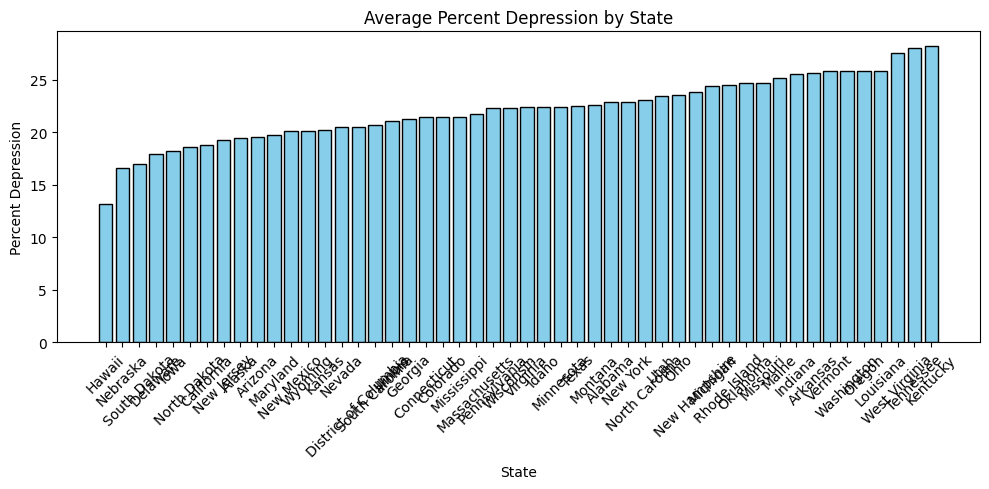

In [96]:

state_means = df.groupby("state")["percent_depression"].mean().sort_values()

plt.figure(figsize=(10,5))
plt.bar(state_means.index, state_means.values, color='skyblue', edgecolor='black')
plt.title("Average Percent Depression by State")
plt.xlabel("State")
plt.ylabel("Percent Depression")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

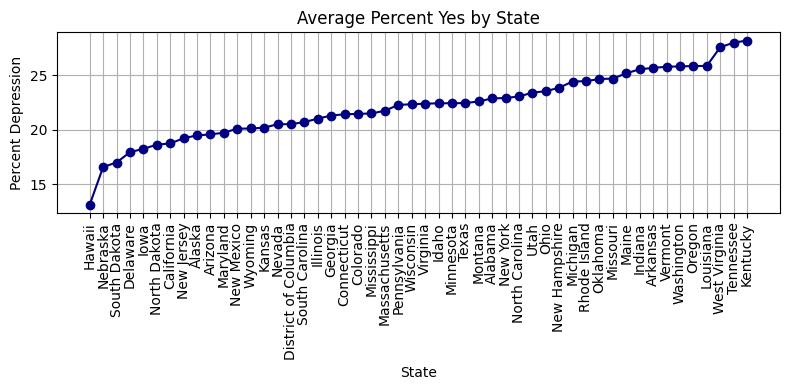

In [99]:
# Group by state and compute the average
avg_state = df.groupby("state")["percent_depression"].mean().sort_values()

plt.figure(figsize=(8,4))
plt.plot(avg_state.index, avg_state.values, marker='o', linestyle='-', color='navy')
plt.title("Average Percent Yes by State")
plt.xlabel("State")
plt.ylabel("Percent Depression")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

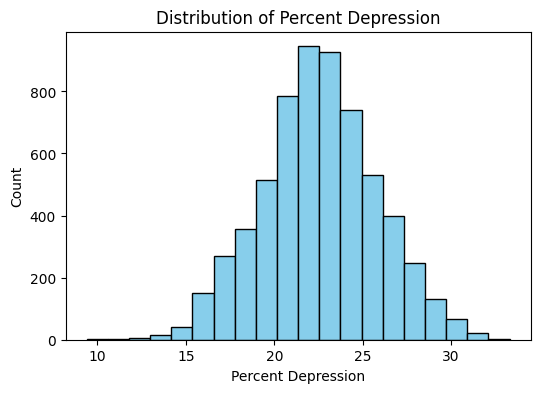

In [100]:
plt.figure(figsize=(6,4))
plt.hist(df['percent_depression'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Percent Depression")
plt.xlabel("Percent Depression")
plt.ylabel("Count")
plt.show()